# Python Project: Disease Prediction using Supervised ML

## Introduction

In this notebook, I will explore and implement different machine learning models on a patient record dataset that contains symptoms and prognosis. The purpose of this project is to demonstrate how to train these different machine learning models so that it can be used to predict diseases based on a patient symptoms.

This project will be broken down into several sections, each focusing on a key aspect of the process. We will begin with loading and cleaning the data, followed by visualizing it to gain insights. Depending on the nature of the project, we might apply various algorithms, build predictive models, or perform complex calculations.

Throughout this notebook, I will be using Python 3.12 as well as leverage important Python libraries such as Numpy, SciPy, Matplotlib and Sci-kit Learn. This will help streamline the process and provide powerful tools for data manipulation and analysis.

The project is structured as follows:

1. **Data Loading and Preprocessing**: Import the necessary datasets and clean the data.
2. **Visualisation**: Visualise dataset and result.
3. **Modeling and Further Analysis**: Apply any models or perform additional analysis.
4. **Conclusion**: Summarize the findings and next steps.

### Models Used

In this project, we will be using the following models to analyze the data and draw insights:

1. **Support Vector Machine**:
   - **Type**: Classification, Regression, Outlier Detection
   - **Description**: [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html) (SVM) are a set of methods used for classification, regression and outliers detection. As you may have guessed, I will use the classification model or SVC. It is capable of performing binary and multi-class classification on a dataset. It takes two input arrays. The first has shape (n_samples, n_features) which holds the training samples, the second array has shape (n_samples) holding the class label. After both inputs are fitted, it can be used to predict new values. It essentially finds the optimal hyperplane in an N-dimensional space to separate data points into different classes. The algorithm maximizes the margin between the closest points of different classes. More info can about SVM can be found [here](https://www.geeksforgeeks.org/support-vector-machine-algorithm/?ref=gcse_outind).

2. **Naive Bayes Classifier**:
   - **Type**: Probabilistic classifier
   - **Description**: A ML algorithm used for classification tasks and it does this using Bayes' Theorem to find probabilities and by assuming the presence of one feature does not affect other features, hence the use of the word "Naive". In sci-kit learn there are a few different Naive Bayes Classifier to choose from. For this project I will use the [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html) which assumes the likelihood of the features to be Gaussian. More infomation can be found [here](https://www.geeksforgeeks.org/naive-bayes-classifiers/).

3. **Random Forest Classifier**:
   - **Type**: Classification, Regression, Decision Tree, Ensemble Technique
   - **Description**: A set of decision trees from a randomly selected subset of the training set. It uses these sets of decision trees for a majority voting to decide on a final prediction. Random Forest Classification is an ensemble learning technique designed to enhance the accuracy and robustness of classification tasks. How it creates these subsets of decision trees is defined by employing a technique called bagging (Bootstrap Aggregating). This means a diverse set of classifiers is created by introducing randomness in the classifier construction. The prediction of the ensemble is given as the averaged prediction of the individual classifiers. The sci-kit page for this model can be found [here](https://scikit-learn.org/stable/modules/ensemble.html#forest) as well as a beginner friendly introduction [here](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/?ref=gcse_outind).


For more details on the specific project dependencies, versions and dataset, visit my GitHub repository: [https://github.com/ISectionU/Disease-Prediction-Using-ML](https://github.com/ISectionU/Disease-Prediction-Using-ML).

In [1]:
# Importing libraries to be used
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline

## Data Loading and Preprocessing + Visualisation

The dataset has already been downloaded and stored in project directory prior starting this project. Details on where to acquire the dataset used can be found in my project repo. Before beginning any analysis on the data, I load the train_data and inspect the structure of it.

*note: I have not loaded the test_data.csv yet. This will be used for testing models later.*

### Reading the Data

In [19]:
# set max rows and columns I want to see as the csv file is large
pd.set_option('display.max_rows', 6) 
pd.set_option('display.max_columns',5)
csvTrain = pd.read_csv('Dataset/train_data.csv') 
print(csvTrain)

      itching  skin_rash  ...                prognosis  Unnamed: 133
0           1          1  ...         Fungal infection           NaN
1           0          1  ...         Fungal infection           NaN
2           1          0  ...         Fungal infection           NaN
...       ...        ...  ...                      ...           ...
4917        0          0  ...  Urinary tract infection           NaN
4918        0          1  ...                Psoriasis           NaN
4919        0          1  ...                 Impetigo           NaN

[4920 rows x 134 columns]


Last column is a null column, this will have to be removed. When training models, it is important to determine if our target column is balanced or not. In this case, the prognosis column. Imbalanced datasets is when there's a majority class whist at the same time a underrepresented class in the dataset (the minority class). This presents challenges for predictive modeling as a model can become biased towards certain predictions, that result in a high percentage of accurate predictions, but poor overall performance.

Balancing a dataset makes training a model easier because it helps prevent the model from becoming biased towards one class. In other words, the model will no longer favor the majority class just because it contains more data.

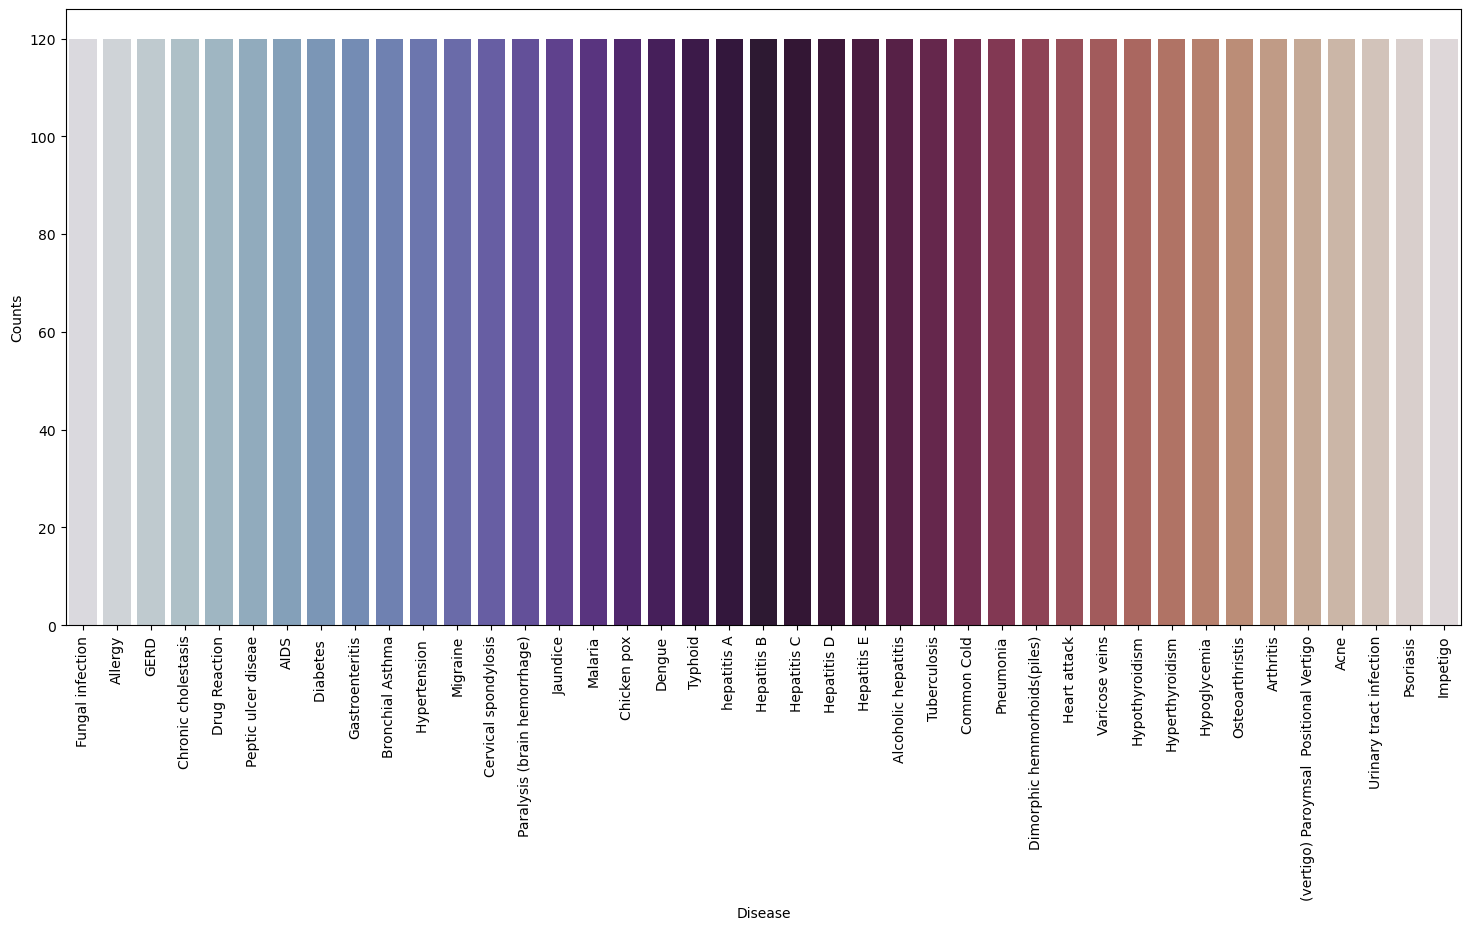

In [20]:
# Removing null column and checking whether the dataset 
# is balanced or not
csvTrain = pd.read_csv('Dataset/train_data.csv').dropna(axis = 1)

# Counting the number of occurrences of each unique value in the 
# prognosis column. It returns a pandas Series object, where each unique 
# value is an index label and its count is the corresponding value
disease_counts = csvTrain["prognosis"].value_counts() 

# Create a temporary dataframe (df) object from disease_counts
temp_df = pd.DataFrame({
    'Disease': disease_counts.index, 
    'Counts': disease_counts.values
})

# plotting
plt.figure(figsize = (18,8))
sns.barplot(data = temp_df, x = 'Disease', y = 'Counts',
            hue = 'Disease',
            palette='twilight')
plt.xticks(rotation=90)
plt.show()

There is exactly 120 samples for each disease meaning balancing the dataset is not required. The target column (prognosis) is a string type therefore not suitable to train a machine learning model. I will be using a label encoder to convert the prognosis column to the numerical (int) datatype. Label Encoder converts the labels into numerical form by assigning a unique index to the labels. If the total number of labels is n, then the numbers assigned to each label will be between 0 to n-1.

In [21]:
# Encoding the target value into numerical
# value using LabelEncoder()
encoder = LabelEncoder()
csvTrain["prognosis"] = encoder.fit_transform(csvTrain["prognosis"])
print(csvTrain["prognosis"])

0       15
1       15
2       15
        ..
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int64


I can check whether the dataset has now been replaced with the encoder as follows:

In [22]:
print(csvTrain)

      itching  skin_rash  ...  yellow_crust_ooze  prognosis
0           1          1  ...                  0         15
1           0          1  ...                  0         15
2           1          0  ...                  0         15
...       ...        ...  ...                ...        ...
4917        0          0  ...                  0         38
4918        0          1  ...                  0         35
4919        0          1  ...                  1         27

[4920 rows x 133 columns]


As you can see, the prognosis column values has been replaced with their respective encoder values.

### Splitting csvTrain

The dataset has been inspected and cleaned. I also converted the prognosis labels to numerical format. Now I will split the train_data so that I may perform a validation test on my models. I will be splitting it into 80:20 format i.e. 80% of the dataset will be used for training the model and 20% of the data will be used to evaluate the performance of the models. Explanation for why I do this is discussed in section *Modeling and Further Analysis*.

In [23]:
X_sym = csvTrain.iloc[:,:-1] # for alternative way use: data.iloc[:,0:132]
y_prog = csvTrain.iloc[:,-1] # for alternative way use: data.iloc[:,132]

X_train, X_test, y_train, y_test = train_test_split(   # X_test + y_test = validation set 
    X_sym, y_prog, test_size = 0.2, random_state = 24) # see explaination below 

print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


## Modeling and Further Analysis

Different models have varying in-built parameters that can affect the models performance on data. Learning the parameters of a model (prediction function) and testing it on the same data leads to overfitting: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. To solve this, in supervised ML, it is common practice to fit the model on a '***train set***' after which evaluation is done on the '***validation set***' (seeing how well a particular model performs). When the ML model has reached a desired accuracy, final evaluation/implentation can be done on the '***test set***'. 

What is a validation set? A validation set in machine learning is a portion of data that is separated from the training data and used to evaluate a model's performance during the training process, allowing for fine-tuning of hyperparameters and selecting the best model configuration without overfitting to the training data itself; essentially acting as a "*test*" set within the training phase to assess generalization ability to unseen data.

That being said, partitioning datasets into three sets (train set, validation set and test set), would drastically reduce the number of samples which can be used for learning the model, and the results can depend on a particular random choice for the pair of (train, validation) sets. This raises a problem; how can you evaluate ML models wihtout partitioning the dataset into even smaller sets?

The answer is to follow a procedure called cross-validation (CV for short). Below is a flowchart of typical cross validation workflow in model training. The best parameters can be determined by grid search techniques.

<img src="images/cv_diagram.png" style="margin:auto" width="600" height="340" />

To be more specific, I will be using K-Fold cross-validation (K-Fold CV) to evaluate the machine-learning models mentioned earlier. It is supported by the sci-kit learn module under the cross_val_score function. It goes as follows:

> ***K-Fold Cross-Validation***:
> 
>    1. Training set is split into $k$ smaller sets.
>    2. A model is trained using $k-1$ of the folds (subsets) as training data.
>    3. The resulting model is validated on the remaining part of the data, i.e the $k^{th}$ subset is used as a test set to compute a performance measure such as accuracy.
>    4. Repeat this until all subsets are evaluated.

<img src="images/kfolds_diagram.png" style="margin:auto" width="600" height="340" />

This is why I split my train_data.csv into train and validation set. I perform K-fold Cross validation on my entire train_data.csv to find the optimal model and it's parameters but still be able to use the validation set for actual evaluation.

The cross_val_score function requires the model to be used, the training data and a scoring function which I will be defining as cv_scoring.

*Note: cross_val_score does not return a fitted model, only scores of the estimator for each run of the cross validation.*

In [24]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X_features, y_target):
    return accuracy_score(y_target, estimator.predict(X_features)) # Returns the fraction of correctly classified samples                                                               

In [25]:
# Initialising Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}
# Producing cross validation score for the models:
#    - Model (m) is selected and fitted on X_sym and y_prog.
#    - cv = 10 means 10 k-folds chosen => 10 subsets created.
#    - cv_scoring function chosen the scoring parameter for cross_val_score. Scoring parameter accepts string or callabe object/function
#      with signature scorer(estimator, X, y) which should return only a single value.
for model_name in models:
    m = models[model_name]
    scores = cross_val_score(m, X_sym, y_prog, cv = 10,  
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


All models score an average of 1.0 meaning they are performing very well. 

To build a robust model I will combine all models by taking the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one. This approach will help us to keep the predictions much more accurate on completely unseen data like validation set and test_data.csv. In the below code we will be training all the three models on the train data, checking the quality of the models by using a confusion matrix, and then combine the predictions of all three models.

### Building Classifier by combining all models

Accuracy on train data by SVC() Classifier: 100.0
Accuracy on test (validation) data by SVC() Classifier: 100.0


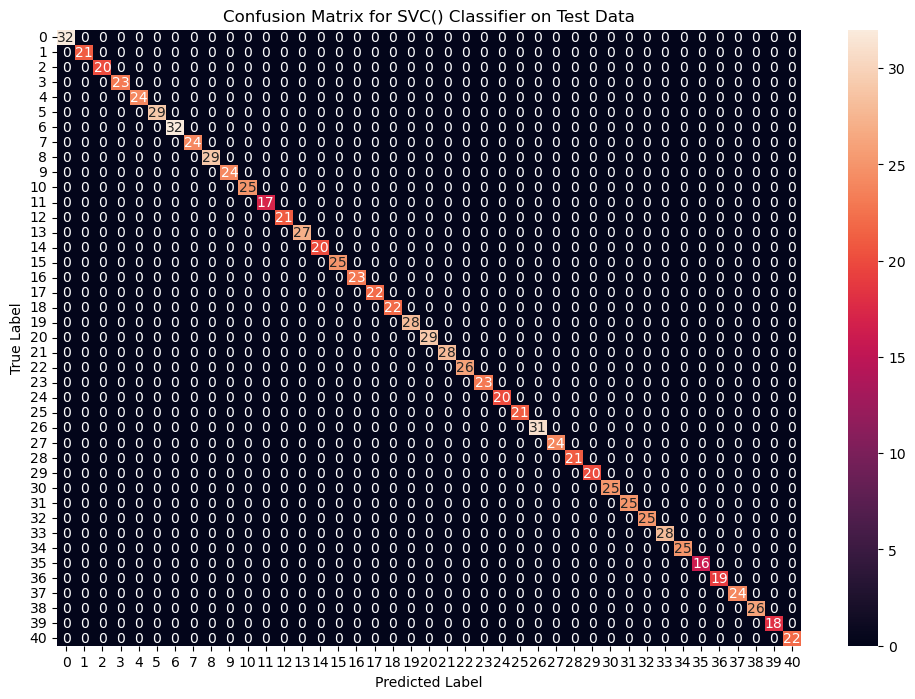

Accuracy on train data by GaussianNB() Classifier: 100.0
Accuracy on test (validation) data by GaussianNB() Classifier: 100.0


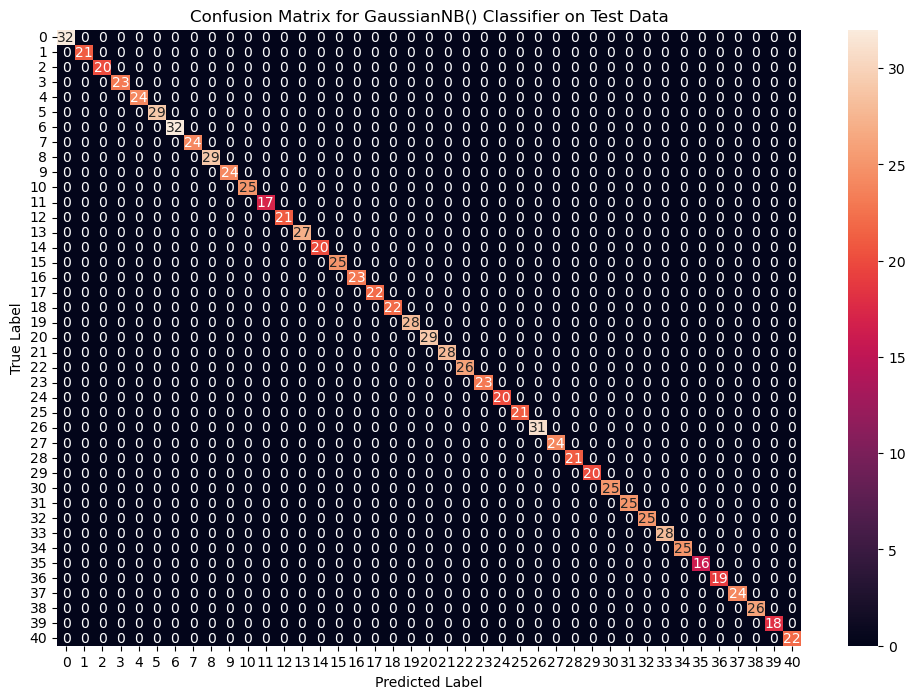

Accuracy on train data by RandomForestClassifier(random_state=18) Classifier: 100.0
Accuracy on test (validation) data by RandomForestClassifier(random_state=18) Classifier: 100.0


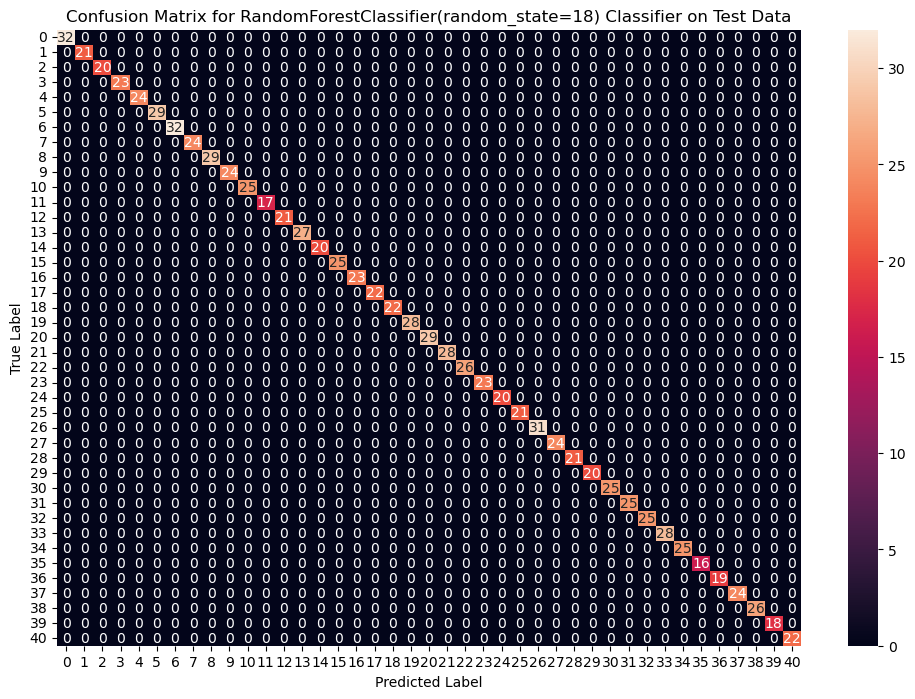

In [26]:
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    # Training and testing model
    m = models[model_name]
    m.fit(X_train, y_train)
    pred = m.predict(X_test)

    print(f'Accuracy on train data by {m} Classifier: {accuracy_score(y_train, m.predict(X_train))*100}')

    print(f"Accuracy on test (validation) data by {m} Classifier: {accuracy_score(y_test, pred)*100}")
    
    # Creating heatmap from confusion matrix
    cf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize=(12,8))
    hm = sns.heatmap(cf_matrix, annot=True)
    plt.title(f'Confusion Matrix for {m} Classifier on Test Data')
    hm.set(xlabel="Predicted Label", ylabel="True Label")

    plt.show()

From the above, each model is performing really well on the validation set. Now that I have established this, I can confidently train each model on the whole train_data.csv and make my machine model implentation on test_data.csv dataset.

In [27]:
# Read test_data.csv file
csvTest = pd.read_csv('Dataset/test_data.csv') 

# Encode and re-label prognosis column
csvTest["prognosis"] = encoder.fit_transform(csvTest["prognosis"])

# Grab feature and target labels
X_test_final = csvTest.iloc[:,:-1]
y_test_final = csvTest.iloc[:,-1]

csvTest

,itching,skin_rash,...,yellow_crust_ooze,prognosis
0,1,1,...,0,15
1,0,0,...,0,4
2,0,0,...,0,16
...,...,...,...,...,...
39,0,1,...,0,35
40,0,1,...,1,27
41,1,1,...,0,15


I will now repeat same steps as I did before to see one by one how each model performs

Accuracy on Test data by SVC() Classifier: 100.0


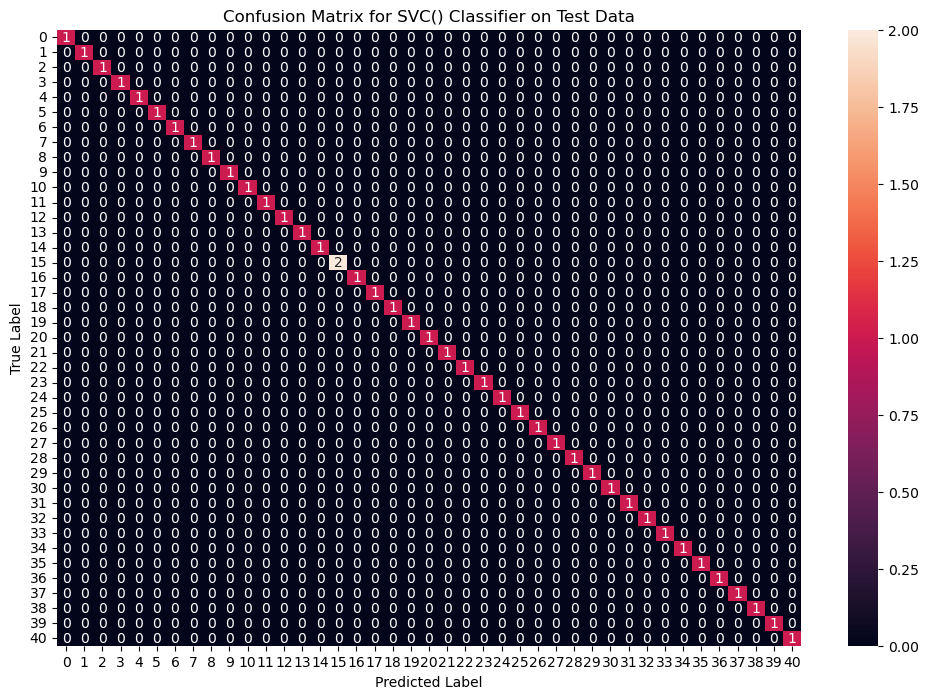

Accuracy on Test data by GaussianNB() Classifier: 100.0


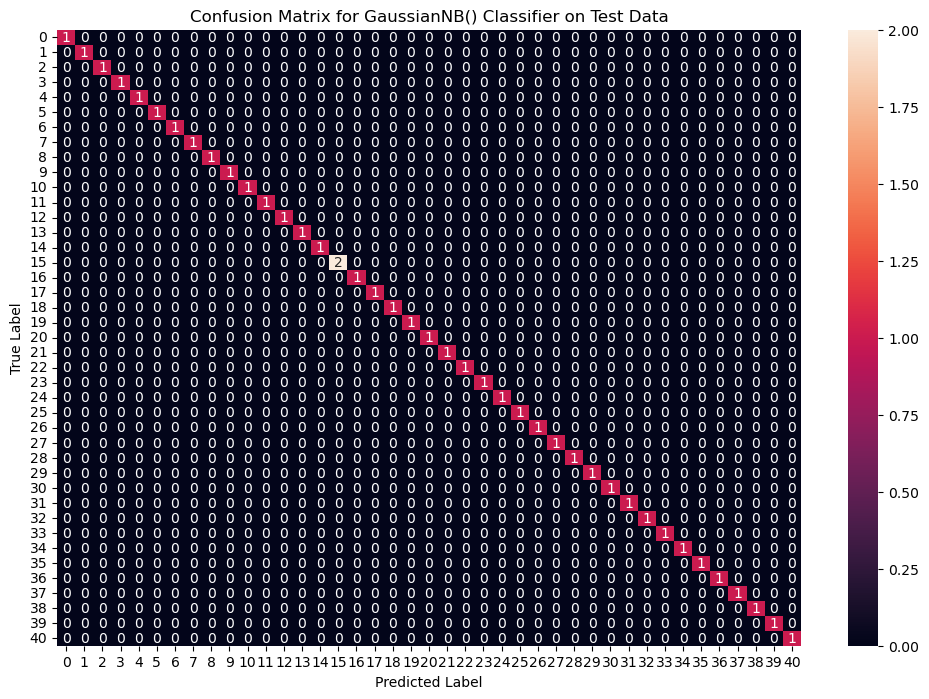

Accuracy on Test data by RandomForestClassifier(random_state=18) Classifier: 97.61904761904762


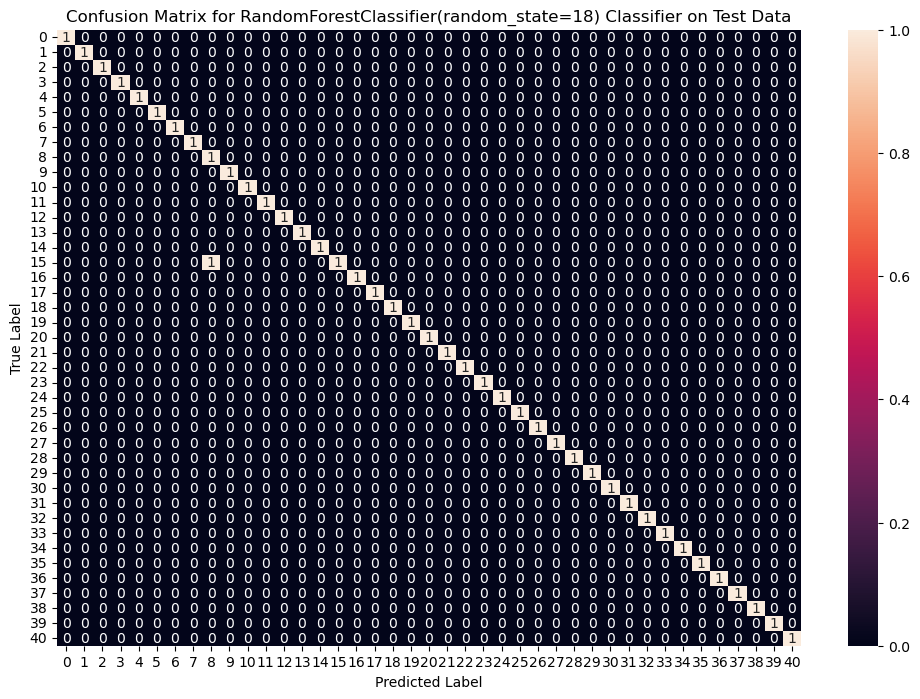

In [28]:
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    # Training on entire train_data. Testing on test_data.
    m = models[model_name]
    m.fit(X_sym, y_prog)
    pred = m.predict(X_test_final)

    print(f'Accuracy on Test data by {m} Classifier: {accuracy_score(y_test_final, pred)*100}')
    
    # Creating heatmap from confusion matrix
    cf_matrix = confusion_matrix(y_test_final, pred)
    plt.figure(figsize=(12,8))
    hm = sns.heatmap(cf_matrix, annot=True)
    plt.title(f'Confusion Matrix for {m} Classifier on Test Data')
    hm.set(xlabel="Predicted Label", ylabel="True Label")

    plt.show()

As hoped for, they all performed really well. I can combine all three by taking the mode out of the predicted disease given by SVC, GaussianNB and RFC.

Accuracy on Test dataset using combined model: 100.0


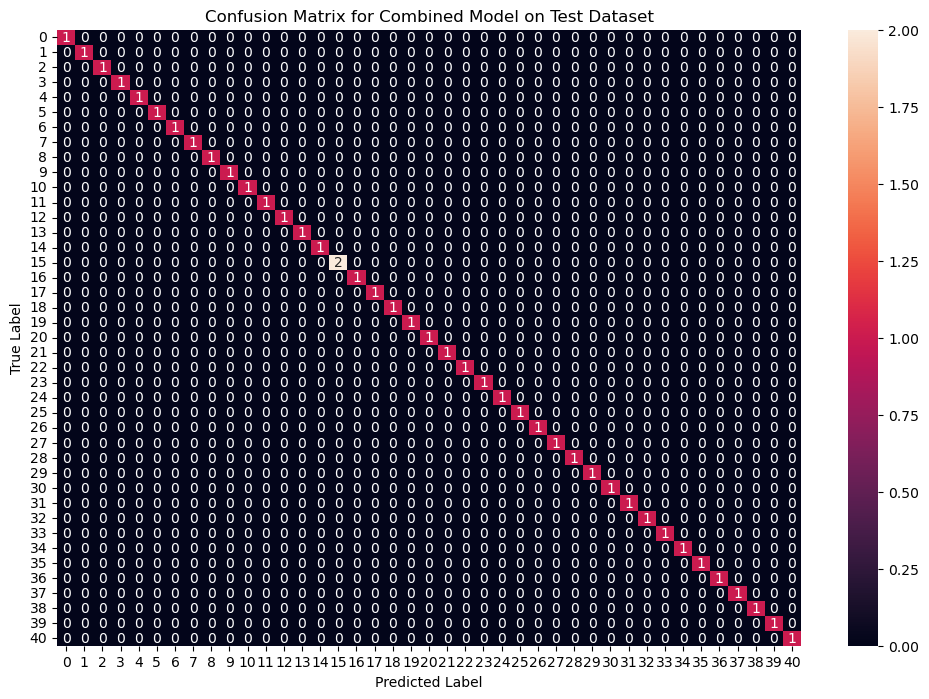

,SVM Model,GaussianNB Model,Random Forest Classifier Model
0,Fungal infection,Fungal infection,Fungal infection
1,Allergy,Allergy,Allergy
2,GERD,GERD,GERD
...,...,...,...
7,Diabetes,Diabetes,Diabetes
8,Gastroenteritis,Gastroenteritis,Gastroenteritis
9,Bronchial Asthma,Bronchial Asthma,Bronchial Asthma


In [34]:
# Initialise empty list to hold the prediction of models
model_pred = [] 

# Initialise empty list to hold the labels that models assign
model_label = []

models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

for model_name in models:
    
    m = models[model_name]
    m.fit(X_sym, y_prog)
    pred = m.predict(X_test_final)
    
    # To get string labels, I use inverse_transform 
    labels = encoder.inverse_transform(pred)
    
    model_pred.append(pred)
    model_label.append(labels)

# I take the modal label value from the three predictions given by the three models as the final disease prediciton
final_pred_mode = [mode([i,j,k]).mode for i,j,k in zip(models_pred[0],models_pred[1],models_pred[2])]

print(f"Accuracy on Test dataset using combined model: {accuracy_score(y_test_final, final_pred_mode)*100}")

cf_matrix = confusion_matrix(y_test_final, final_pred_mode)
plt.figure(figsize=(12,8))
hm = sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
hm.set(xlabel="Predicted Label", ylabel="True Label")

plt.show()


# Create a DataFrame to store the individual predictions of each of the three models
results_df = pd.DataFrame({
    'SVM Model': model_labels[0],
    'GaussianNB Model': model_labels[1],
    'Random Forest Classifier Model': model_labels[2]
})

results_df.head(10)

## Conclusion

I have shown how a moderately sized dataset can provide relatively easy and quick results in predicting diseases. Even though the dataset provides a lot of symptoms, one major drawback is that new symptoms render my analysis useless. If I want my machine learning models to be more robust then a lot more symptoms need to be accounted for alongside with any new prognosis. 

Also, it is very clear that the diseases itself have a clear disctintion among themsselves, resulting in very high scores in my models. To further test my models, a lot more dieases with overlapping symptoms needs to be added. If this shows that my models are struggling to predict correctly, then finetuning of parameters needs to be explored. I did not do this in my project since my models were already performing really well. Another way to provide more robustness is to consider adding more machine learning models such as K-nearest neighbours.